This is an example of developing a script locally with the West Nile Virus data to share on Kaggle
Once you have a script you're ready to share, paste your code into a [new script](https://www.kaggle.com/c/predict-west-nile-virus/scripts/new).

In [127]:
# For working locally, you want to be in west_nile_scripts/working. 
# This command will move you to there, if you're in west_nile_scripts/src (where this file is).
!cd ../working/ # Not necessary for scripts running on Kaggle

In [128]:
# Code is borrowed from: https://www.kaggle.com/users/213536/vasco/predict-west-nile-virus/west-nile-heatmap

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
#Remove this when copying to a script on Kaggle:
%matplotlib inline
import datetime as dt
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

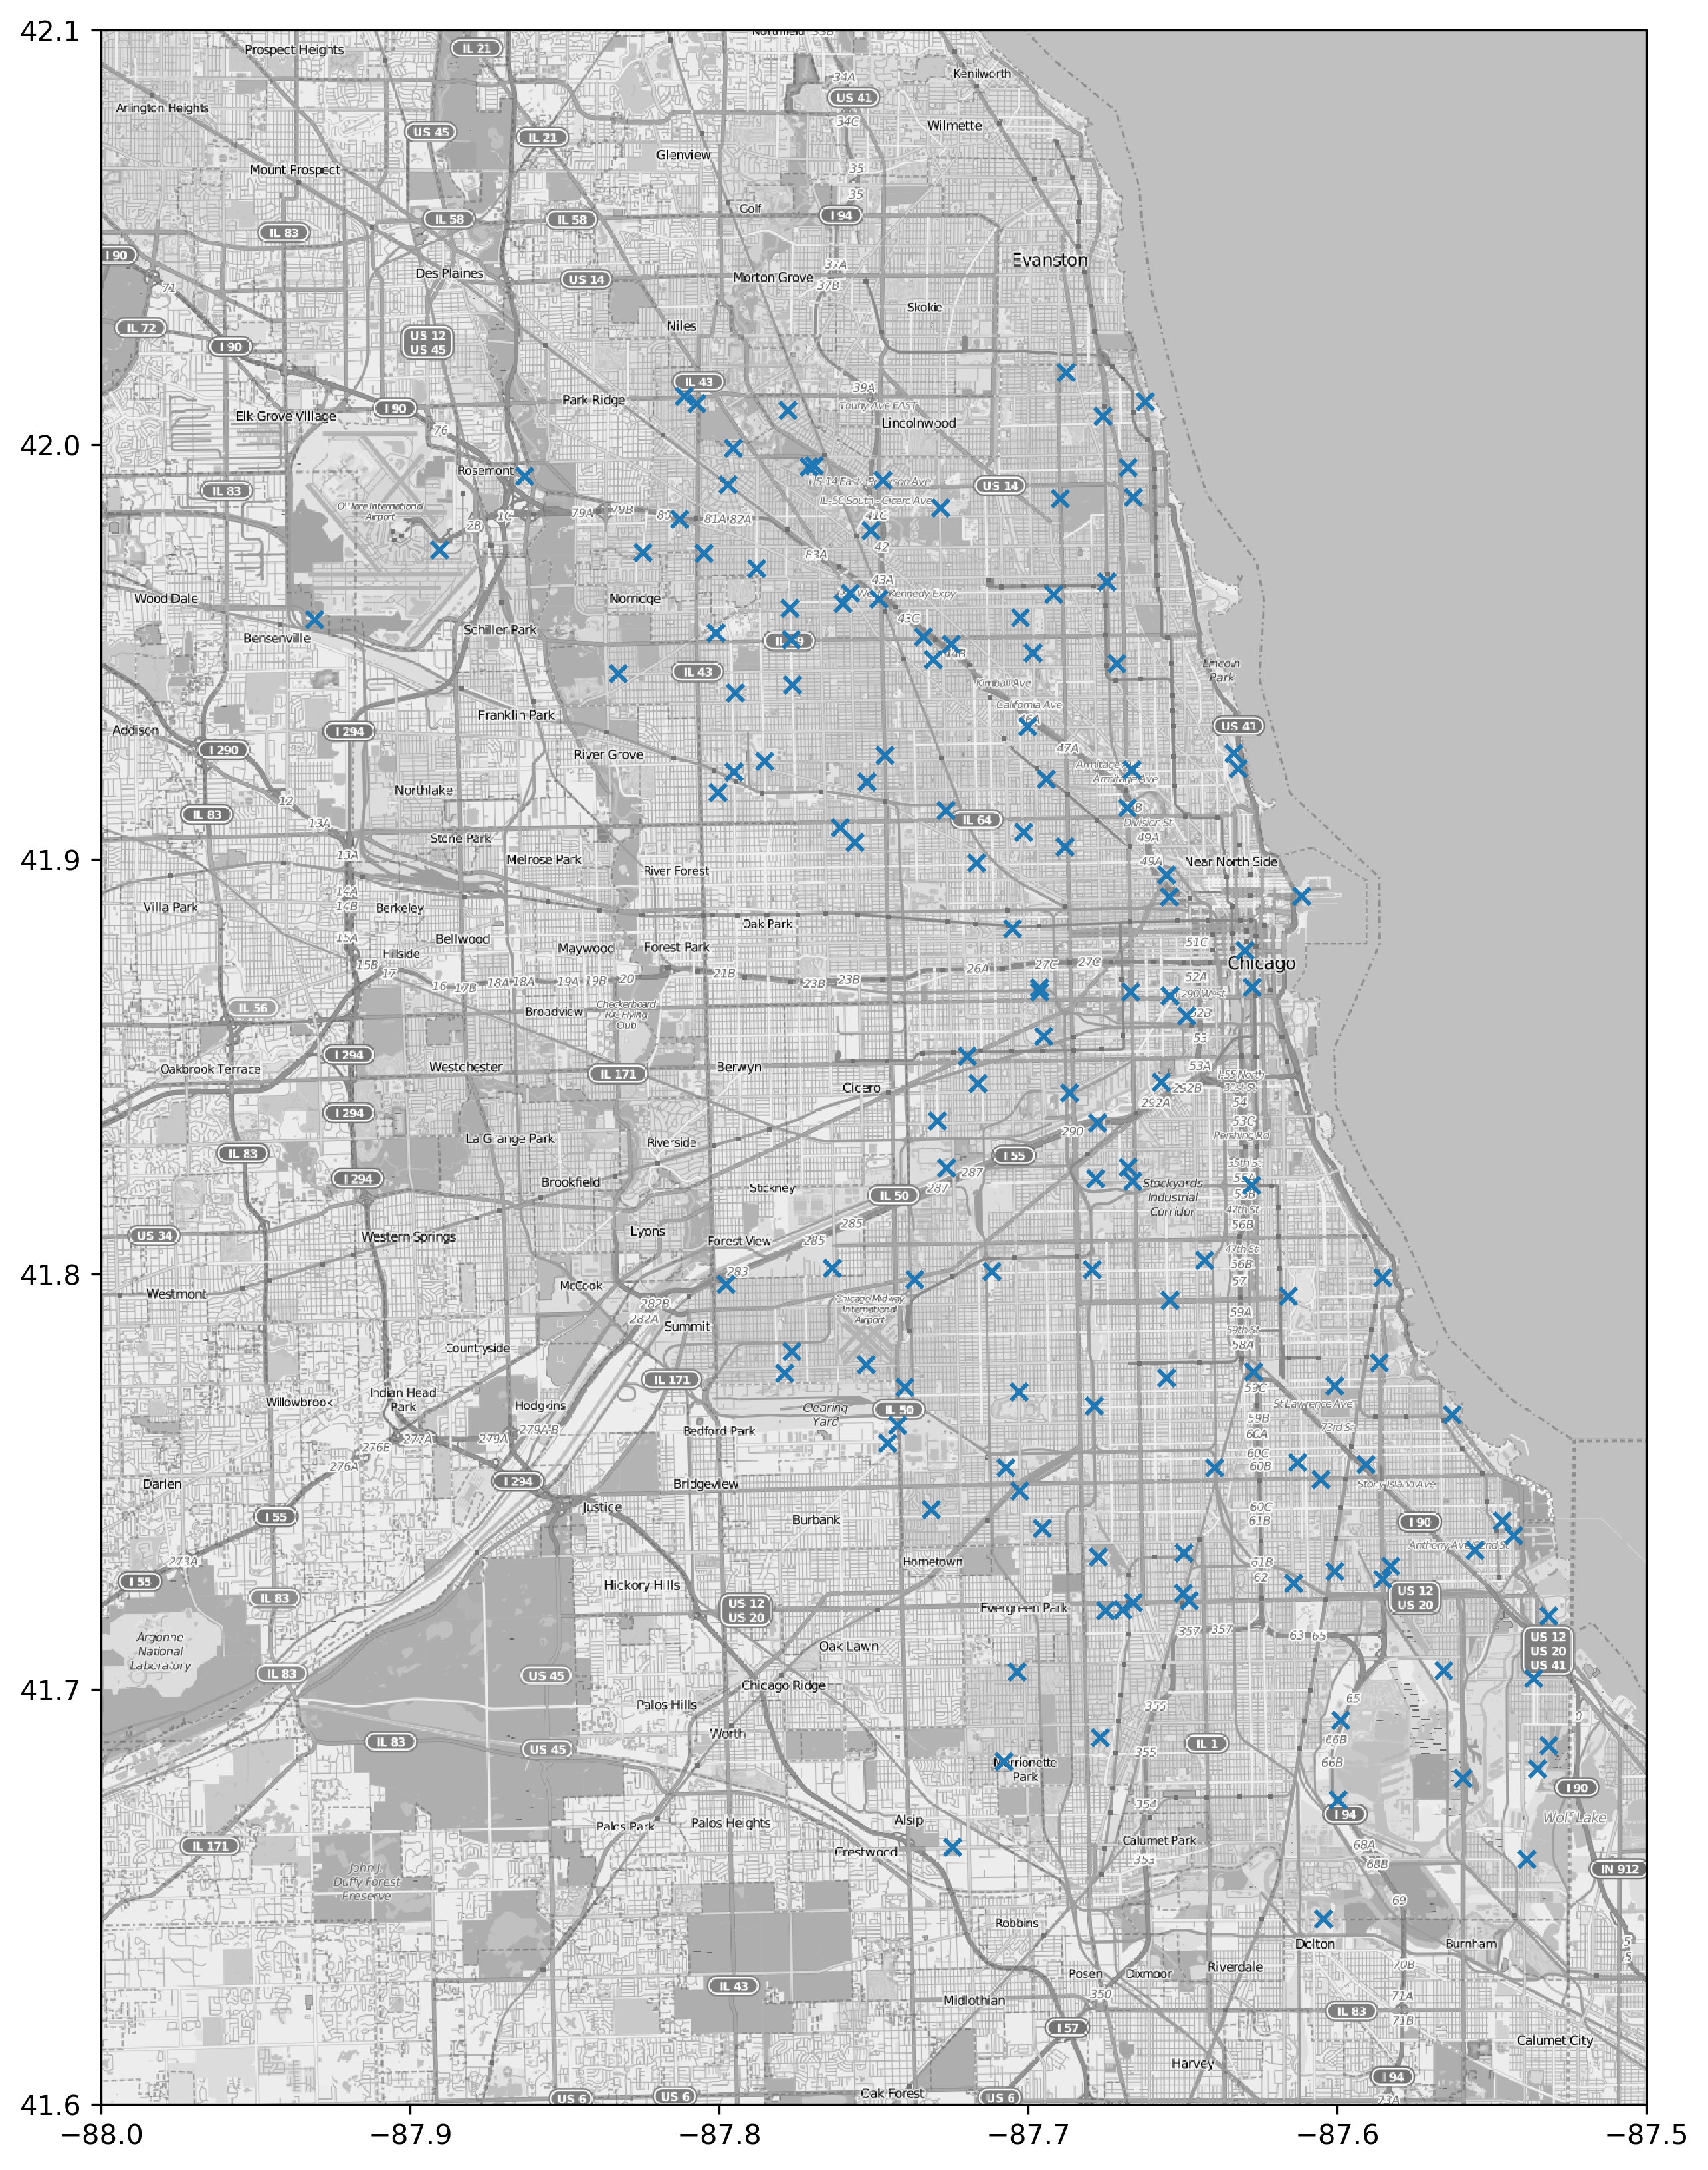

In [129]:


mapdata = np.loadtxt("../input/mapdata_copyright_openstreetmap_contributors.txt")
traps = pd.read_csv('../input/train.csv')[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]
weather = pd.read_csv('../input/weather.csv')
spray = pd.read_csv('../input/spray.csv')

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(10,14))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

locations = traps[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(locations[:,0], locations[:,1], marker='x')

# Add this when copying to a script on Kaggle:
#plt.savefig('heatmap.png')

In [130]:
#plt.savefig('heatmap.png')

In [131]:
len(traps[traps.WnvPresent == 1])

551

In [132]:
spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [134]:
#I think I can drop resultspeed, resultdir, avgspeed
weather.Date = pd.to_datetime(weather.Date)
traps.Date = pd.to_datetime(traps.Date)
weather = weather.drop(["CodeSum", "Depth", "Water1", "SnowFall"], 1)

In [135]:
# convert to numeric, convert M(missing) to nulls
for i in range(2,len(weather.columns)):
    weather.iloc[:, i] = pd.to_numeric(weather.iloc[:,i],errors='coerce')


In [138]:
weather.fillna(method='ffill',inplace=True)

In [140]:
weather.head(10)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67.0,14.0,51,56.0,0.0,2.0,448.0,1849.0,0.0,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68.0,14.0,51,57.0,0.0,3.0,448.0,1849.0,0.0,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51.0,-3.0,42,47.0,14.0,0.0,447.0,1850.0,0.0,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52.0,-3.0,42,47.0,13.0,0.0,447.0,1850.0,0.0,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56.0,2.0,40,48.0,9.0,0.0,446.0,1851.0,0.0,29.39,30.12,11.7,7,11.9
5,2,2007-05-03,67,48,58.0,2.0,40,50.0,7.0,0.0,446.0,1851.0,0.0,29.46,30.12,12.9,6,13.2
6,1,2007-05-04,66,49,58.0,4.0,41,50.0,7.0,0.0,444.0,1852.0,0.0,29.31,30.05,10.4,8,10.8
7,2,2007-05-04,78,51,58.0,4.0,42,50.0,7.0,0.0,444.0,1852.0,0.0,29.36,30.04,10.1,7,10.4
8,1,2007-05-05,66,53,60.0,5.0,38,49.0,5.0,0.0,443.0,1853.0,0.0,29.40,30.10,11.7,7,12.0
9,2,2007-05-05,66,54,60.0,5.0,39,50.0,5.0,0.0,443.0,1853.0,0.0,29.46,30.09,11.2,7,11.5


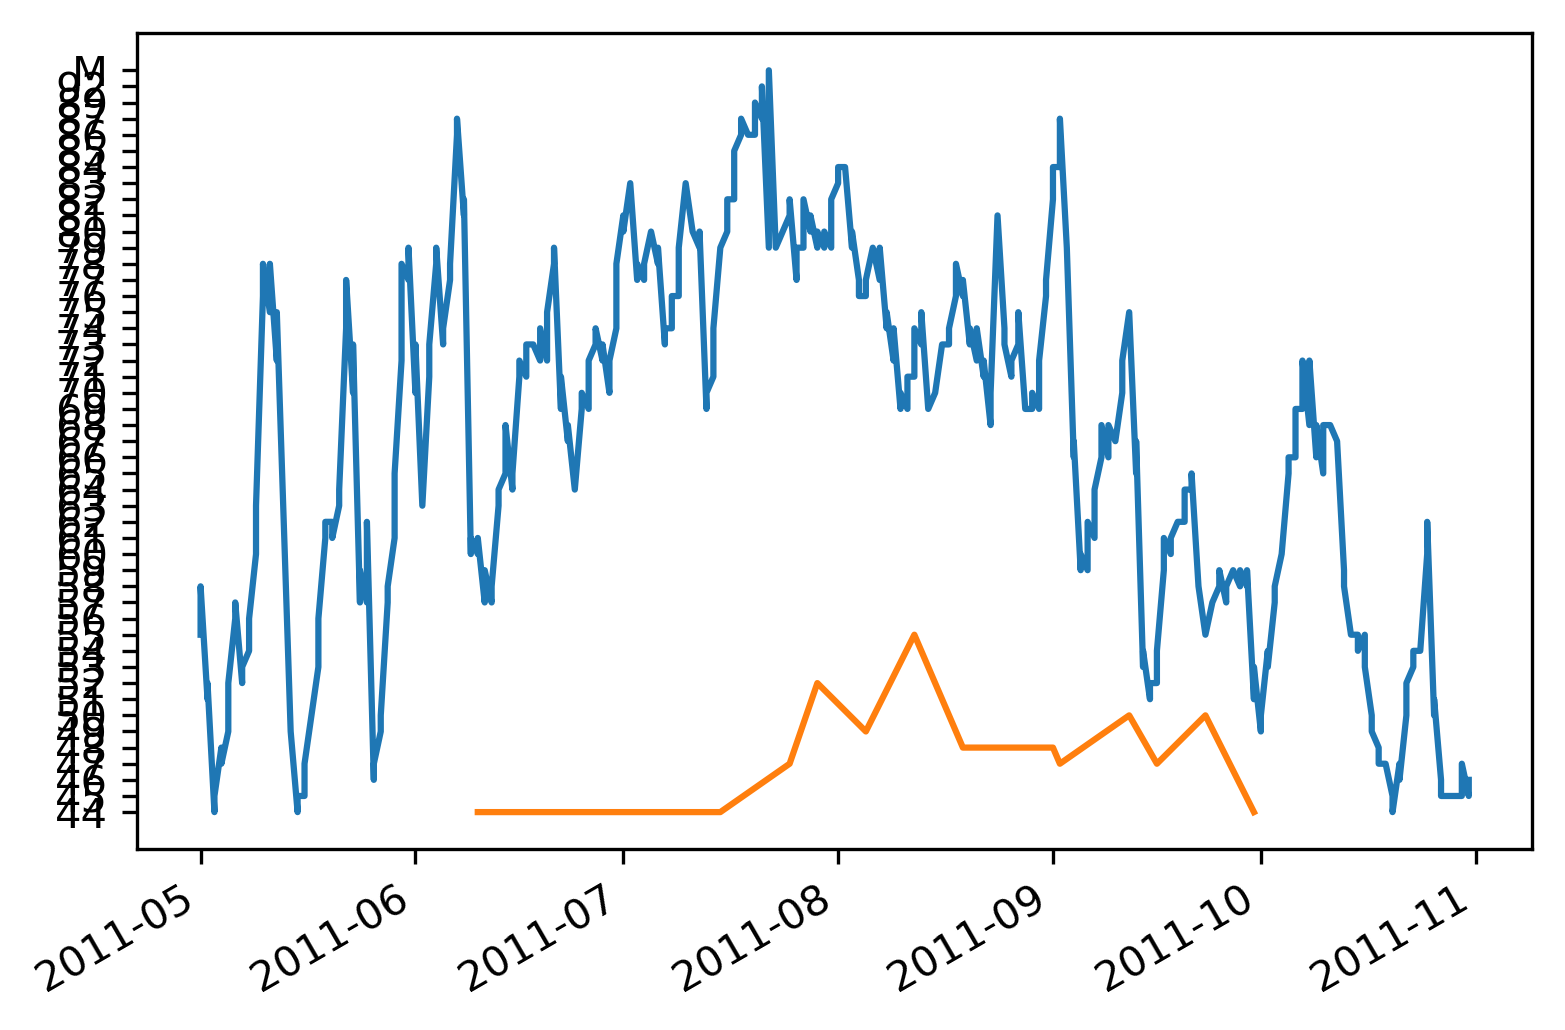

In [115]:
# dates = dates.date2num(weather.Date)
# plt.plot_date(dates, weather.Tavg)
plt.plot(weather[(weather.Date < dt.date(2012,1,1)) & (weather.Date > dt.date(2011,1,1))].Date,
        weather[(weather.Date < dt.date(2012,1,1)) & (weather.Date > dt.date(2011,1,1))].Tavg)
plt.plot(traps_2011.groupby('Date').agg('sum').index, traps_2011.groupby('Date').agg('sum').WnvPresent)
plt.gcf().autofmt_xdate()

In [110]:
traps_2011.groupby('Date').agg('sum').index, traps_2011.groupby('Date').agg('sum').WnvPresent

(DatetimeIndex(['2011-06-10', '2011-06-17', '2011-06-24', '2011-06-30',
                '2011-07-11', '2011-07-15', '2011-07-25', '2011-07-29',
                '2011-08-05', '2011-08-12', '2011-08-19', '2011-08-26',
                '2011-09-01', '2011-09-02', '2011-09-12', '2011-09-16',
                '2011-09-23', '2011-09-30'],
               dtype='datetime64[ns]', name='Date', freq=None), Date
 2011-06-10     0
 2011-06-17     0
 2011-06-24     0
 2011-06-30     0
 2011-07-11     0
 2011-07-15     0
 2011-07-25     3
 2011-07-29     8
 2011-08-05     5
 2011-08-12    11
 2011-08-19     4
 2011-08-26     4
 2011-09-01     4
 2011-09-02     3
 2011-09-12     6
 2011-09-16     3
 2011-09-23     6
 2011-09-30     0
 Name: WnvPresent, dtype: int64)

In [111]:
traps_2011.groupby('Date').agg('sum').WnvPresent

Date
2011-06-10     0
2011-06-17     0
2011-06-24     0
2011-06-30     0
2011-07-11     0
2011-07-15     0
2011-07-25     3
2011-07-29     8
2011-08-05     5
2011-08-12    11
2011-08-19     4
2011-08-26     4
2011-09-01     4
2011-09-02     3
2011-09-12     6
2011-09-16     3
2011-09-23     6
2011-09-30     0
Name: WnvPresent, dtype: int64

In [77]:
weather[(weather.Date < dt.date(2010,1,1)) & (weather.Date > dt.date(2009,1,1))].Date.head()

736   2009-05-01
737   2009-05-01
738   2009-05-02
739   2009-05-02
740   2009-05-03
Name: Date, dtype: datetime64[ns]

In [97]:
traps_2009 = traps[(traps.Date < dt.date(2010,1,1)) & (traps.Date > dt.date(2009,1,1))]
traps_2011 = traps[(traps.Date < dt.date(2012,1,1)) & (traps.Date > dt.date(2011,1,1))]

In [79]:
traps_2009.groupby('Date').agg('sum').index

DatetimeIndex(['2009-05-28', '2009-06-02', '2009-06-03', '2009-06-05',
               '2009-06-12', '2009-06-15', '2009-06-19', '2009-06-22',
               '2009-06-26', '2009-06-29', '2009-07-06', '2009-07-10',
               '2009-07-13', '2009-07-17', '2009-07-24', '2009-07-27',
               '2009-07-31', '2009-08-07', '2009-08-13', '2009-08-25',
               '2009-08-27', '2009-09-03', '2009-09-14', '2009-09-17',
               '2009-09-25', '2009-10-01'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [116]:
# import numpy as np
# from scipy.interpolate import Rbf, InterpolatedUnivariateSpline

# import matplotlib
# matplotlib.use('Agg')
# import matplotlib.pyplot as plt

# # xi = weather[(weather.Date < dt.date(2012,1,1)) & (weather.Date > dt.date(2011,1,1))].Tavg
# # # use fitpack2 method
# # ius = InterpolatedUnivariateSpline(weather[(weather.Date < dt.date(2012,1,1)) & (weather.Date > dt.date(2011,1,1))].Date,
# #         weather[(weather.Date < dt.date(2012,1,1)) & (weather.Date > dt.date(2011,1,1))].Tavg)
# # yi = ius(xi)

# # import statsmodels.api as sm
# # sm.tsa.seasonal_decompose(weather[(weather.Date < dt.date(2012,1,1)) & (weather.Date > dt.date(2011,1,1))].Tavg).plot()
# # result = sm.tsa.stattools.adfuller(weather[(weather.Date < dt.date(2012,1,1)) & (weather.Date > dt.date(2011,1,1))].Date)
# # plt.show()
# Tavg = weather[(weather.Date < dt.date(2012,1,1)) & (weather.Date > dt.date(2011,1,1))].Tavg
# Date = weather[(weather.Date < dt.date(2012,1,1)) & (weather.Date > dt.date(2011,1,1))].Date
# Date.corr(Tavg)